In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [118]:
presc = pd.read_csv('../data_prep/opioids_V4.csv.gz', compression='gzip')
wards = pd.read_csv('../data_prep/Wards.csv')

In [87]:
LSOA_London = pd.read_csv('../data_prep/2019_pop_LSOA.csv', thousands=',')

In [88]:
presc['YYYYMM'].unique()

array([201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
       201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
       201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612,
       201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102])

In [89]:
LSOA_London.head()

,LSOA Code,All Ages
0,E01011949,1954
1,E01011950,1257
2,E01011951,1209
3,E01011952,1740
4,E01011953,2033


In [90]:
# LSOA_London = LSOA_London[['Lower Super Output Area','Total_pop']].copy()

In [92]:
presc_sub = presc[presc['YYYYMM'] == 201501]

In [93]:
presc_sub.head()

,YYYYMM,LSOA_CODE,Total_quantity,OME,Total_cost,Total_items,Patient_count
0,201501,E01012190,8117.848013,151249.342942,921.450033,79.617055,1414.0
1,201501,E01012191,9187.953839,158654.427929,1053.212762,89.871863,1618.0
2,201501,E01012192,10144.495686,201049.085035,1009.184458,95.718262,1511.0
3,201501,E01012194,9172.387641,185041.298174,923.882028,86.353560,1480.0
4,201501,E01012195,9872.556801,194251.752367,978.190107,93.063754,1624.0


In [94]:
presc_merged = pd.merge(presc_sub,LSOA_London , left_on='LSOA_CODE',right_on='LSOA Code')

presc_merged.corr()

,YYYYMM,Total_quantity,OME,Total_cost,Total_items,Patient_count,All Ages
YYYYMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_quantity,NaN,1.000000,0.398992,0.849437,0.975725,0.104171,0.165449
OME,NaN,0.398992,1.000000,0.425858,0.394552,0.052212,0.086133
Total_cost,NaN,0.849437,0.425858,1.000000,0.882326,0.134052,0.196381
Total_items,NaN,0.975725,0.394552,0.882326,1.000000,0.126277,0.185514
Patient_count,NaN,0.104171,0.052212,0.134052,0.126277,1.000000,0.901699
All Ages,NaN,0.165449,0.086133,0.196381,0.185514,0.901699,1.000000


In [95]:
np.corrcoef(presc_merged['All Ages'], presc_merged['Patient_count'])

array([[1.        , 0.90169878],
       [0.90169878, 1.        ]])

In [96]:
mappings_dir = '../mappings/'
def loadLSOA_mappings():
    LSOA_dist_old = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST.json','rb'))
    LSOA_dist_2021 = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST_2021.json','rb'))
    return [LSOA_dist_old , LSOA_dist_2021]

def prepare_lsoa_GP_population():
    LSOA_patient_pop = {}
    LSOA_patients_map = json.load(open(mappings_dir + 'GPs.json','r'))
    for GP in tqdm(LSOA_patients_map):
        for lsoa in LSOA_patients_map[GP]['Patient_registry_LSOA']:
            if lsoa not in LSOA_patient_pop:
                LSOA_patient_pop[lsoa] = LSOA_patients_map[GP]['Patient_registry_LSOA'][lsoa]
            else:
                LSOA_patient_pop[lsoa] += LSOA_patients_map[GP]['Patient_registry_LSOA'][lsoa]
    return LSOA_patient_pop

In [97]:
old , new = loadLSOA_mappings()

In [99]:
# old.keys()

(1.3862943611198906, 9.876886870738948, 7.456454555176209, 7.48921846837641, 0.24745173549319055)


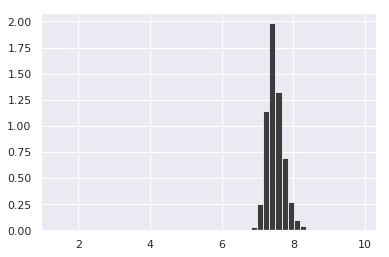

In [100]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(0.007729861676159479, 516.0174861504569, 40.7568003862832, 45.591561463458746, 31.04033560450212)


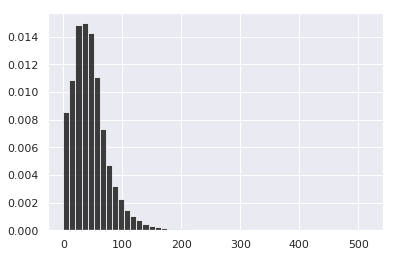

In [101]:
# the histogram of the data
data = (presc['Total_items'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(0.06193636086248984, 11403.602427734975, 427.5167537193392, 470.297095795773, 304.26202076087094)


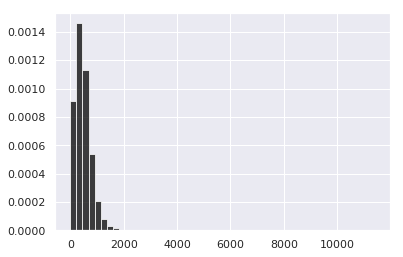

In [102]:
# the histogram of the data
data = (presc['Total_cost'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [103]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London,E01000104,"1,811"
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London,E01000105,"2,349"
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London,E01000106,"2,144"


In [104]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [105]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [106]:
London_preac.sort_values(by=['YYYYMM'],inplace=True)

/10TBdrive/sagarj/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
area_dict = {'YYYYMM':[], 'mean_cost':[] , 'mean_items' : [] , 'mean_quantity' : []}
for name , group in London_preac.groupby('YYYYMM'):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_cost'].append((np.sum(group['Total_cost'])/np.sum(group['Patient_count']))*1000)
    area_dict['mean_items'].append((np.sum(group['Total_items'])/np.sum(group['Patient_count']))*1000)
    area_dict['mean_quantity'].append((np.sum(group['OME'])/np.sum(group['Patient_count']))*1000)
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

(96.41091690373173, 133.69563540895177, 112.37806958692687, 113.90952445274633, 8.527238521491062)


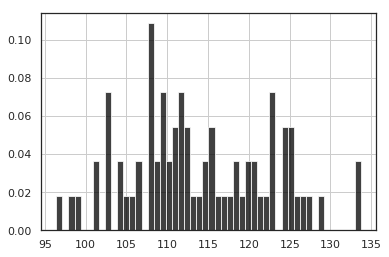

In [193]:
data = (area_df['mean_cost'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

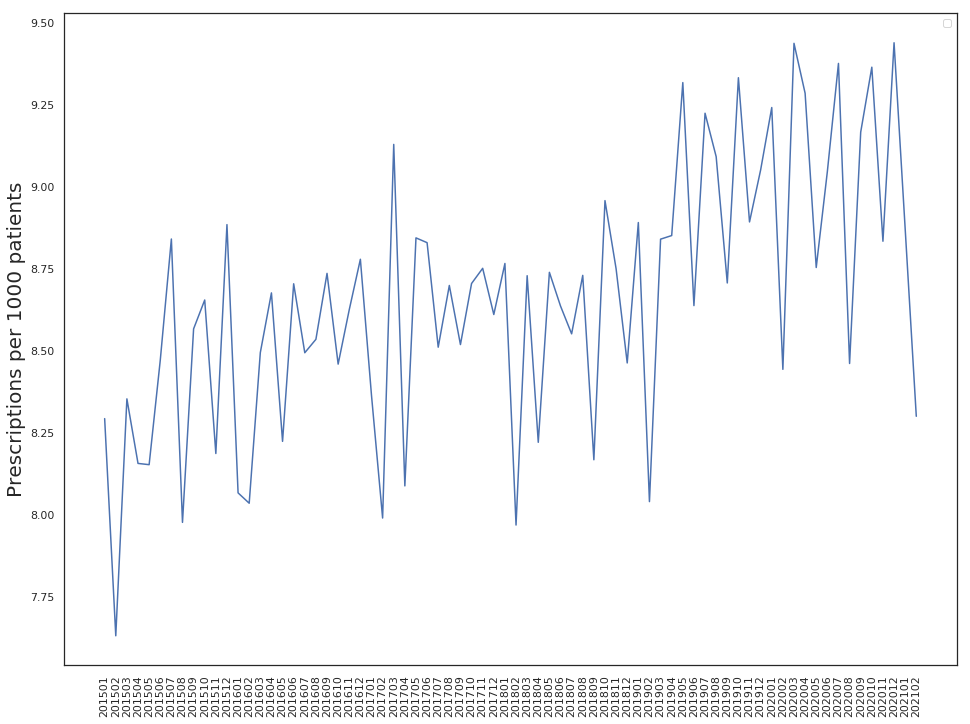

In [199]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.grid(False)
# plt.title("Anti allergic prescriptions",fontsize=20)
sns.lineplot(y=area_df['mean_items'],x=np.arange(0,len(area_df),1))
plt.ylabel("Prescriptions per 1000 patients",fontsize=20)
# sns.lineplot(y=area_df['mean_cost'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)
ax.legend()

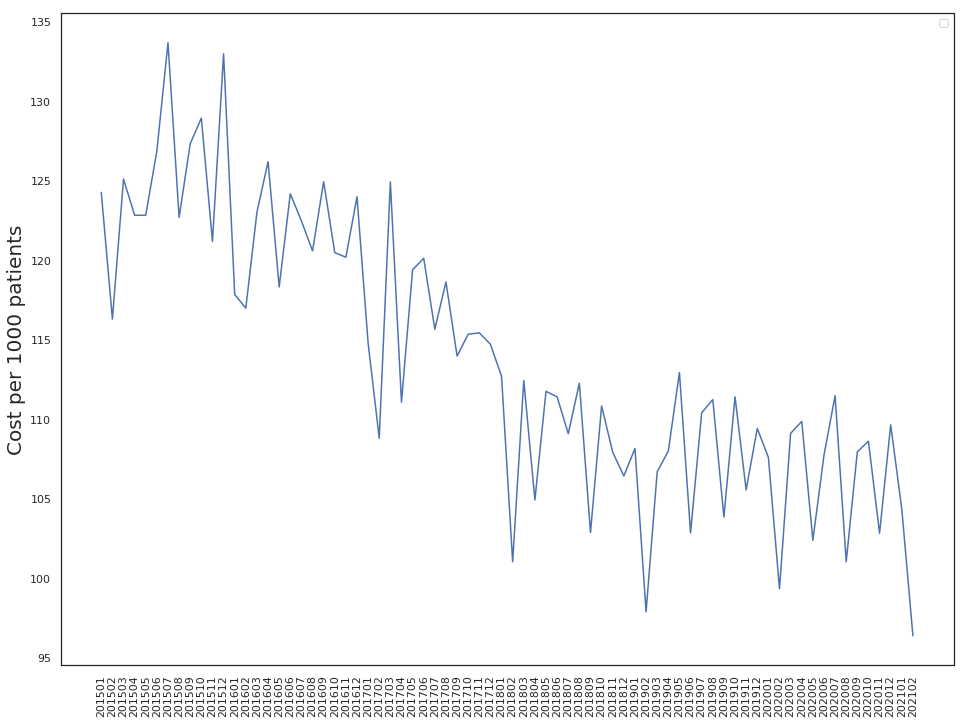

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.grid(False)
# plt.title("Anti allergic prescriptions",fontsize=20)

sns.lineplot(y=area_df['mean_cost'],x=np.arange(0,len(area_df),1))
plt.ylabel("Cost per 1000 patients",fontsize=20)
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)
ax.legend()

In [119]:
presc_sub = presc[(presc['YYYYMM'] >= 201501) & (presc['YYYYMM'] <= 201512)]

In [120]:
# presc_sub.head(n=10)

In [121]:
presc_sub_wards = pd.merge(presc_sub , wards , left_on='LSOA_CODE', right_on='LSOA11CD')

In [122]:
presc_sub_wards.head(n=5)

,YYYYMM,LSOA_CODE,Total_quantity,OME,Total_cost,Total_items,Patient_count,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,201501,E01012190,8117.848013,151249.342942,921.450033,79.617055,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
1,201502,E01012190,7422.084295,148583.156967,817.545075,71.865610,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
2,201503,E01012190,8247.599052,133096.131676,904.617372,79.554977,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
3,201504,E01012190,8041.657861,225060.334223,885.355699,78.308315,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
4,201505,E01012190,8424.425186,121275.550302,899.677353,78.968573,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436


In [173]:
lsoa_dict = {'LSOA_CODE': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('LSOA_CODE'):
    lsoa_dict['LSOA_CODE'].append(name)
    lsoa_dict['Patients'].append(np.log(group.iloc[1]['All Ages']))
    lsoa_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
lsoa_df = pd.DataFrame.from_dict(lsoa_dict)

In [174]:
lsoa_df.head(n=5)

,LSOA_CODE,Patients,Total_OME
0,E01000001,7.401842,1.048301
1,E01000002,7.252762,1.729450
2,E01000003,7.437206,2.550968
3,E01000005,7.315218,1.172886
4,E01000006,7.532624,5.063806


In [175]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(lsoa_df['Total_OME'], lsoa_df['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=lsoa_df['Total_OME'],y=lsoa_df['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.06847514394130208, 1.9595688878310442e-35)
(0.01382269356208217, 7.3172684920696565, 0.06847514394130207, 1.9595688878610433e-35, 0.0011113498947668344)


Text(0.1,0.7,'$R^2$: 0.00')

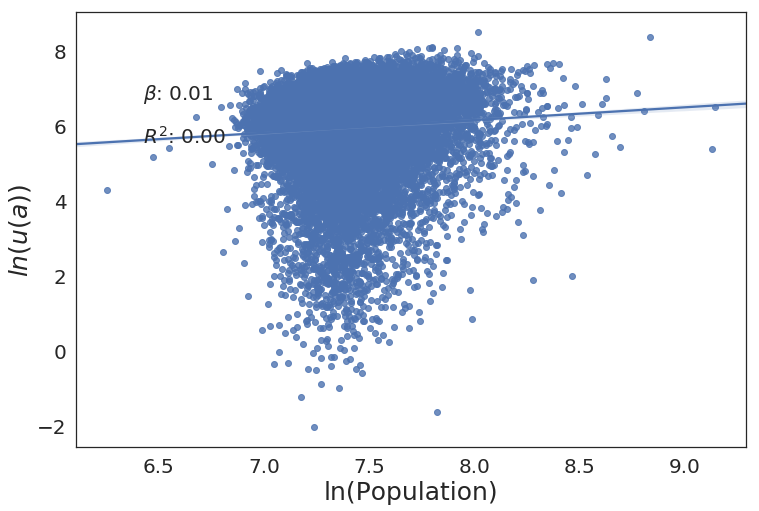

In [176]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=lsoa_df['Patients'],y=lsoa_df['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(predict_dosage , gt_dosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)

In [177]:
presc_sub_wards.head(n=4)

,YYYYMM,LSOA_CODE,Total_quantity,OME,Total_cost,Total_items,Patient_count,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,201501,E01012190,8117.848013,151249.342942,921.450033,79.617055,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
1,201502,E01012190,7422.084295,148583.156967,817.545075,71.865610,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
2,201503,E01012190,8247.599052,133096.131676,904.617372,79.554977,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
3,201504,E01012190,8041.657861,225060.334223,885.355699,78.308315,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436


In [178]:
la_dict = {'LA_CODE': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('LAD15CD'):
    la_dict['LA_CODE'].append(name)
    la_dict['Patients'].append(np.log(sum(group['All Ages'])/12))
    la_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
la_df = pd.DataFrame.from_dict(la_dict)

In [179]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(la_df['Total_OME'], la_df['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=la_df['Total_OME'],y=la_df['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.6580762717284876, 7.92128955235928e-42)
(0.5262614054381174, 6.2652945033715834, 0.6580762717284876, 7.92128955235916e-42, 0.03345181271824574)


Text(0.1,0.7,'$R^2$: 0.43')

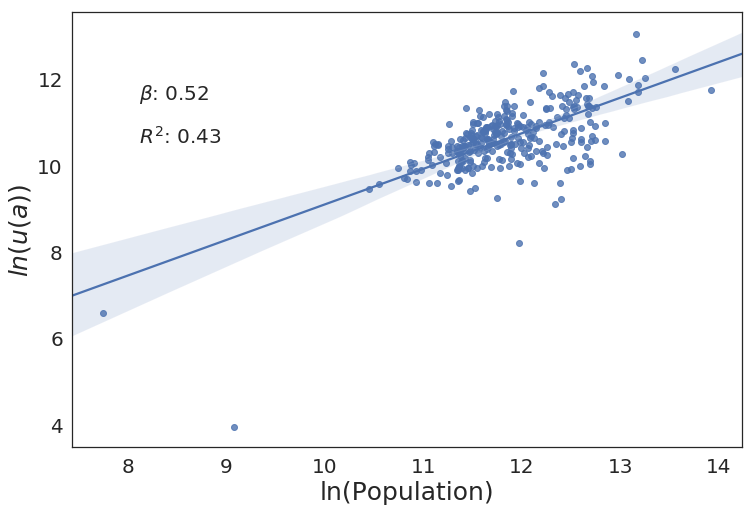

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=la_df['Patients'],y=la_df['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(predict_dosage , gt_dosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)

In [181]:
city_dict = {'City': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('CityName'):
    city_dict['City'].append(name)
    city_dict['Patients'].append(np.log(sum(group['All Ages'])))
    city_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
city_df = pd.DataFrame.from_dict(city_dict)

In [182]:
# city_dict['City']

In [183]:
max(city_df['Patients']) , min(city_df['Patients'])

(18.456615834585445, 13.63334098961949)

In [184]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': x, 'y':  y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=15)

In [185]:
city_df_sub = city_df[~city_df['City'].isin(['Bath','Scunthorpe','Grimsby'])]

In [186]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(city_df_sub['Total_OME'], city_df_sub['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=city_df_sub['Total_OME'],y=city_df_sub['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.7217603095675635, 2.5743506004288063e-18)
(0.6953188148414311, 6.960889778679696, 0.7217603095675637, 2.5743506004288113e-18, 0.06538380676133161)


Text(0.1,0.7,'$R^2$: 0.52')

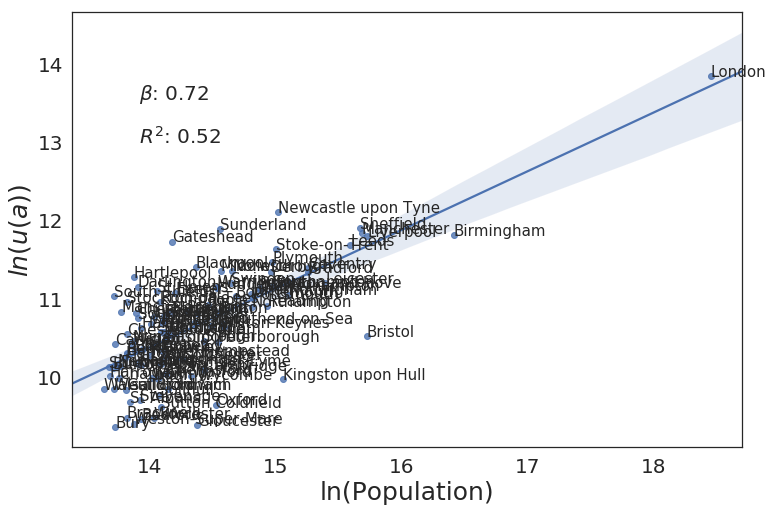

In [187]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=city_df_sub['Patients'],y=city_df_sub['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
label_point(city_df_sub['Patients'] , city_df_sub['Total_OME'] , city_df_sub['City'] , ax)
ax.annotate(r"$\beta$" +": " +  str(r_value_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)